In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom TREND RULES\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom TREND RULES
LumberJack Jyss (c)


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df =  pd.read_csv('simanim.csv')

In [5]:
df.head()

,Local time,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,...,Low_eurusd,Close_eurusd,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd
0,10.04.2004 02:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003009,37.355005,1.210666,1.209442,1.208217,0.001222,1.20888
1,10.04.2004 03:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003035,37.355005,1.210610,1.209471,1.208331,0.001134,1.20888
2,10.04.2004 04:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003060,37.355005,1.210553,1.209414,1.208275,0.001053,1.20888
3,10.04.2004 05:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003084,37.355005,1.210526,1.209373,1.208219,0.000978,1.20888
4,10.04.2004 06:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003107,37.355005,1.210429,1.209311,1.208192,0.000908,1.20888


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131566 entries, 0 to 131565
Data columns (total 43 columns):
Local time           131566 non-null object
Open_audusd          131566 non-null float64
High_audusd          131566 non-null float64
Low_audusd           131566 non-null float64
Close_audusd         131566 non-null float64
Volume_audusd        131566 non-null float64
Open_usdjpy          131566 non-null float64
High_usdjpy          131566 non-null float64
Low_usdjpy           131566 non-null float64
Close_usdjpy         131566 non-null float64
Volume_usdjpy        131566 non-null float64
Open_gbpusd          131566 non-null float64
High_gbpusd          131566 non-null float64
Low_gbpusd           131566 non-null float64
Close_gbpusd         131566 non-null float64
Volume_gbpusd        131566 non-null float64
Open_nzdusd          131566 non-null float64
High_nzdusd          131566 non-null float64
Low_nzdusd           131566 non-null float64
Close_nzdusd         131566 non-nul

In [7]:
df.shape

(131566, 43)

In [8]:
long_list = []
short_list = []
equity_list = []
c = 0
cc = 0
long_target = 0.0001
short_target = - 0.0001

equity = 100000
print('Début de la boucle')

import sys
orig_stdout = sys.stdout
f = open('out_v0_3.txt', 'w')
sys.stdout = f


for i in range(0,df.shape[0]):
    print('\nCompteur de ligne :',i)
    print('Date :',df.iloc[i,0])
    c+=1
    
    candle_close = float(df.iloc[i,34])
    candle_close_1 = float(df.iloc[i-1,34])
    candle_close_2 = float(df.iloc[i-2,34])
    candle_close_3 = float(df.iloc[i-3,34])
    candle_close_4 = float(df.iloc[i-4,34])
    candle_open = float(df.iloc[i,31])
    candle_high = float(df.iloc[i,32])
    candle_low = float(df.iloc[i,33])
    
    var1 = candle_open - candle_close_1
    var2 = candle_open - candle_close_2
    var3 = candle_open - candle_close_3
    var4 = candle_open - candle_close_4
    
    if var1 > long_target*2 and var2 > long_target*3 and\
    var3 > long_target*4 and var4 > long_target*4 :
        print('\nDate :',df.iloc[i,0])
        print('Long effectué, pnl :',var1,', ',var2,', ',var3,', ',var4)
        equity = equity -3 + var4*100000
        print('Nouvel equity :')
        long_list.append(1)
        short_list.append(0)
        equity_list.append(equity)
        cc+=1
    
    elif var1< short_target*2 and var2 < short_target*3 and \
    var3 < short_target*4 and var4 < short_target*4:
        print('\nDate :',df.iloc[i,0])
        print('Short effectué, pnl :',var1,', ',var2,', ',var3,', ',var4)
        equity = equity -3 - var4*100000
        print('Nouvel equity :')
        short_list.append(1)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1
    
    else :
        print('\nDate :',df.iloc[i,0])
        print('Il ne se passe rien')
        short_list.append(0)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print('La règle était 4 périodes consécutives au dessus de long ou au dessous de short')
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",equity-100000 )
    
f.close()
sys.stdout = orig_stdout


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print('La règle était 4 périodes consécutives au dessus de long ou au dessous de short, en x2, x3, x4, x4')
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000,2) )

var_dtf = pd.DataFrame()
var_dtf['Long'] = long_list
var_dtf['Short'] = short_list
var_dtf['Equity'] = equity_list

 
    

Début de la boucle
Boucle terminée
La long target était fixée à  0.0001
La short target était fixée à  -0.0001
La règle était 4 périodes consécutives au dessus de long ou au dessous de short, en x2, x3, x4, x4
Il y a eu  131566  périodes testées
Durant cette période, 941  long et  937  short
Les gains totaux s'élèvent à : 475892.0


In [9]:
sum(short_list)+sum(long_list), c, cc, len(short_list),len(long_list),len(equity_list),len(df)

(1878, 131566, 131566, 131566, 131566, 131566, 131566)

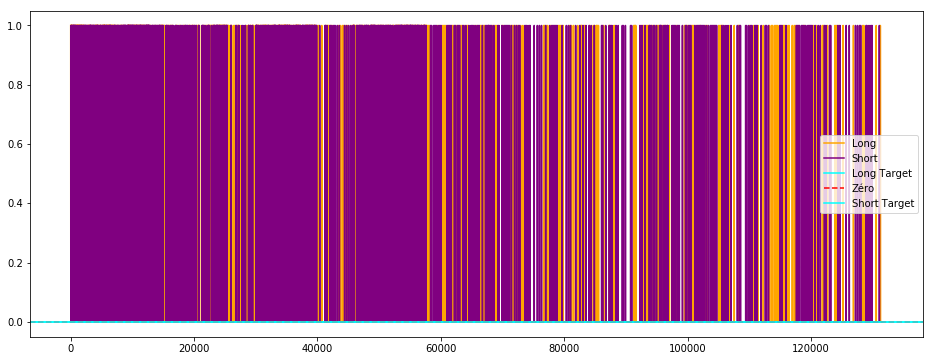

In [10]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Long'],color='orange',label='Long')
plt.plot(var_dtf['Short'],color='purple',label='Short')
plt.axhline(y=long_target, color='cyan',linestyle='-', label='Long Target')
plt.axhline(y=0, color='red',linestyle='--', label='Zéro')
plt.axhline(y=short_target,color='cyan',label='Short Target')
plt.legend()

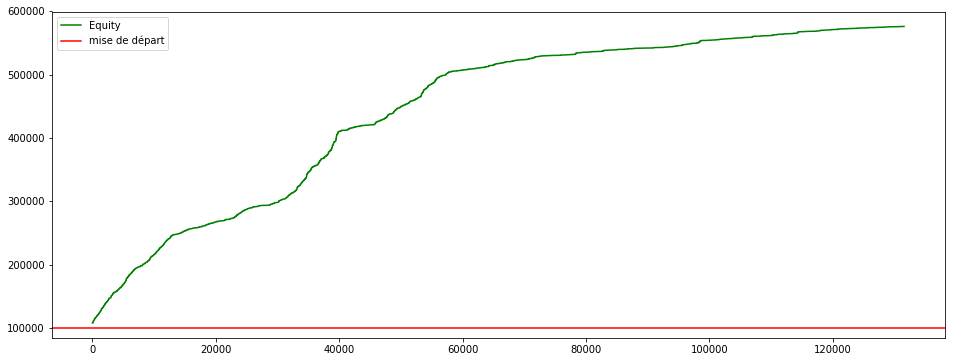

In [11]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Equity'],color='green',label='Equity')
plt.axhline(y=100000., color='red',linestyle='-', label='mise de départ')
plt.legend()

In [12]:
len(short_list),len(long_list),len(df)

(131566, 131566, 131566)

In [13]:
df['short'] = short_list
df['long'] = long_list

In [14]:
print('Nombre de positions de long trouvées :',sum(long_list))
print('Nombre de positions short trouvées :',sum(short_list))
print('Sur un total de ',sum(short_list)+sum(long_list))

Nombre de positions de long trouvées : 941
Nombre de positions short trouvées : 937
Sur un total de  1878


In [15]:
print('Sur un achat systématique, les gains représentent',\
      round((sum(short_list)+sum(long_list))/(len(short_list)+len(long_list))*100,2),'%')

Sur un achat systématique, les gains représentent 0.71 %


In [16]:
#df['short'] = df['trend'].shift(-1)

In [17]:
df.tail()

,Local time,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,...,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,short,long
131561,13.04.2019 19:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002625,47.79156,1.13006,1.13006,1.13006,0.000210,1.13006,0,0
131562,13.04.2019 20:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002628,47.79156,1.13006,1.13006,1.13006,0.000195,1.13006,0,0
131563,13.04.2019 21:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000181,1.13006,0,0
131564,13.04.2019 22:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000168,1.13006,0,0
131565,13.04.2019 23:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000156,1.13006,0,0


In [18]:
df = df.dropna()
df.tail()

,Local time,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,...,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,short,long
131561,13.04.2019 19:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002625,47.79156,1.13006,1.13006,1.13006,0.000210,1.13006,0,0
131562,13.04.2019 20:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002628,47.79156,1.13006,1.13006,1.13006,0.000195,1.13006,0,0
131563,13.04.2019 21:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000181,1.13006,0,0
131564,13.04.2019 22:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000168,1.13006,0,0
131565,13.04.2019 23:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000156,1.13006,0,0


In [19]:
df['short'].sum(),df['long'].sum()

(937, 941)

In [20]:
df.to_csv('dataset_ready_to_use.csv')